In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# load acc_df
acc_df = pd.read_csv('../results/csv/acc_df.csv')

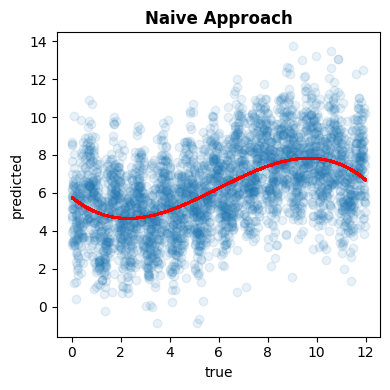

In [64]:
x = acc_df['true']
y = acc_df['pred']

# plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, y, 'o', alpha=0.1, zorder=1)
# fit a sinusoid line through x and y
p = np.poly1d(np.polyfit(x, y, 3))
ax.scatter(x, p(x), s=1, c='r', zorder=2)
ax.set_xlabel('true')
ax.set_ylabel('predicted')
ax.set_title('Naive Approach', weight='bold')
fig.tight_layout()
plt.savefig('../results/plots/naive_approach_acc.png', dpi=300)

In [30]:
# load loss_df, mae_df and clock_reg
loss_df = pd.read_csv('../results/csv/loss_df.csv', index_col=0)
mae_df = pd.read_csv('../results/csv/mae_df.csv', index_col=0)
clock_reg = pd.read_csv('../results/csv/clock_reg.csv')

In [31]:
# concatenate all loss_df columns into one series
all_loss = pd.concat([loss_df[col] for col in loss_df.columns], ignore_index=True)
all_mae = pd.concat([mae_df[col] for col in mae_df.columns], ignore_index=True)

# shapes
print('loss_df shape:', all_loss.shape)
print('mae_df shape:', all_mae.shape)

loss_df shape: (200,)
mae_df shape: (200,)


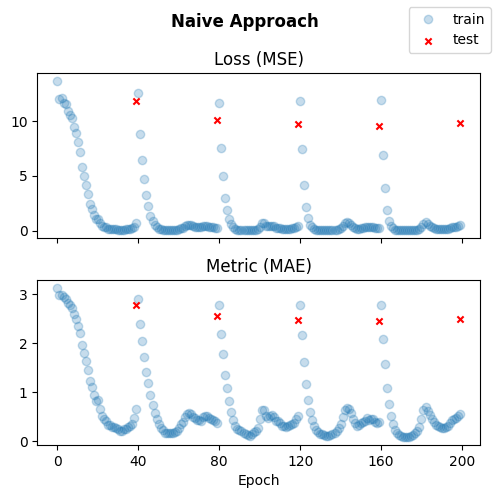

In [65]:
# two subplots, one with loss and the other with mae
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5), sharex=True)

ax1.plot(all_loss, 'o', alpha=0.25, zorder=1, label='train')
for i in range(5):
    ax1.scatter(39+i*40, clock_reg['mae'][i], s=20, marker='x', c='r', zorder=2, label='test')
ax1.set_title('Loss (MSE)')
ax1.set_yscale('log')

ax2.plot(all_mae, 'o', alpha=0.25, zorder=1)
for i in range(5):
    ax2.scatter(39+i*40, clock_reg['mse'][i], s=20, marker='x', c='r', zorder=2)
ax2.set_xticks(np.arange(0, 201, 40))
ax2.set_xlabel('Epoch')
ax2.set_title('Metric (MAE)')
ax2.set_yscale('log')

handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys())
fig.suptitle('Naive Approach', weight='bold')
fig.tight_layout()
fig.savefig('../results/plots/naive_loss_prog.png', dpi=300)
